---

**APRP: 1. Introduction to Probabilistic Graphical Models**

---


**Contents**
--------
1. What is machine learning
2. Different ways of learning from data
3. Why probabilistic graphical models
4. Major types of PGMs

### 1. Setting up the enviroment
Loading common Libraries.


In [45]:
from IPython.display import Image
import numpy as np
import pandas as pd

### 2. Loading and testing the Iris titaset

We can take an example of predicting the type of flower based on the sepal length and width of the flower. Let's say we have some data (discretized iris data set on sepal length and width). The dataset looks something like this:

In [46]:
from sklearn.datasets import load_iris

iris = load_iris()
mini_iris = np.round(iris.data[:, :2]).astype(int)
data = pd.DataFrame(mini_iris, columns=['length', 'width'])
data['type'] = iris.target

#Shuffle data
data = data.iloc[np.random.permutation(len(data))]
data

,length,width,type
34,5,3,0
117,8,4,2
82,6,3,1
148,6,3,2
107,7,3,2
...,...,...,...
32,5,4,0
50,7,3,1
22,5,4,0
10,5,4,0


### 3. Different ways of learning from data

Now let's say we want to predict the type of flower for a new given data point. There are multiple ways to solve this problem. We will consider these two ways in some detail:  

1. We could find a function which can directly map an input value to it's class label. 
2. We can find the probability distributions over the variables and then use this distribution to answer queries about the new data point.

There are a lot of algorithms for finding a mapping function. For example linear regression tries to find a linear equation which explains the data. Support vector machine tries to find a plane which separates the data points. Decision Tree tries to find a set of simple greater than and less than equations to classify the data. Let's try to apply Decision Tree on this data set.

We can plot the data and it looks something like this:

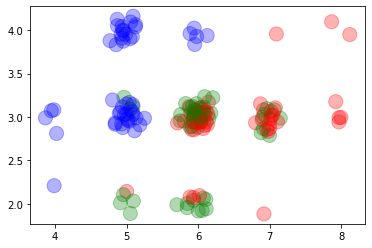

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Adding a little bit of noise so that it's easier to visualize
data_with_noise = data.iloc[:, :2] + np.random.normal(loc=0, scale=0.1, size=(150, 2))
plt.scatter(data_with_noise.length, data_with_noise.width, c=[ "bgr"[k] for k in data.iloc[:,2] ], s=200, alpha=0.3)

In the plot we can easily see that the blue points are concentrated on the top-left corner, green ones in bottom left and red ones in top right. 

Now let's try to train a Decision Tree on this data.

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['length', 'width']].values, data.type.values, test_size=0.2)

classifier = DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train, y_train)
classifier.predict(X_test)

array([1, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0,
       0, 2, 0, 0, 0, 2, 1, 2])

In [49]:
classifier.score(X_test, y_test)

0.6666666666666666

So, in this case we got a classification accuracy of 76.67%.

Now moving on to our second approach using a probabilistic model.
The most obvious way to do this classification task would be to compute a Joint Probability Distribution over all these variables and then marginalize and reduce over these according to our new data point to get the probabilities of classes.

In [50]:
X_train, X_test = data[:120], data[120:]

In [51]:
X_train

,length,width,type
34,5,3,0
117,8,4,2
82,6,3,1
148,6,3,2
107,7,3,2
...,...,...,...
121,6,3,2
129,7,3,2
14,6,4,0
95,6,3,1


In [52]:
# Computing the joint probability distribution over the training data
joint_prob = X_train.groupby(['length', 'width', 'type']).size() / 120
joint_prob

length  width  type
4       2      0       0.008333
        3      0       0.025000
5       2      1       0.025000
               2       0.008333
        3      0       0.141667
               1       0.016667
        4      0       0.116667
6       2      1       0.066667
               2       0.025000
        3      1       0.166667
               2       0.166667
        4      0       0.033333
7       2      2       0.008333
        3      1       0.050000
               2       0.091667
        4      2       0.008333
8       3      2       0.025000
        4      2       0.016667
dtype: float64

In [53]:
# Predicting values

# Selecting just the feature variables.
X_test_features = X_test.iloc[:, :2].values
X_test_actual_results = X_test.iloc[:, 2].values

predicted_values = []
for i in X_test_features:
    predicted_values.append(joint_prob[i[0], i[1]].idxmax())
    
predicted_values = np.array(predicted_values)
predicted_values

array([2, 0, 1, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 2, 0, 0, 0])

In [54]:
# Comparing results with the actual data.
predicted_values == X_test_actual_results

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True])

In [55]:
score = (predicted_values == X_test_actual_results).sum() / 30
print(score)

0.8


### 4. Test the following datasets

- Titanic Survival Dataset;
- Soybean Disease; More info: https://archive-beta.ics.uci.edu/dataset/91/soybean+small


### 4.1 - Titanic Dataset

In [56]:
titanic = pd.read_csv("titanic.csv")
titanic.columns


Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [71]:
#titan = titanic.drop(titanic.index[-1])
#titan.to_csv('titanic.csv', index=False)
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [72]:
print(titanic.isna().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [73]:
tita = pd.DataFrame(titanic, columns=['pclass','sex'])
tita['survived'] = titanic.survived 
tita


,pclass,sex,survived
0,1.0,female,1.0
1,1.0,male,1.0
2,1.0,female,0.0
3,1.0,male,0.0
4,1.0,female,0.0
...,...,...,...
1304,3.0,female,0.0
1305,3.0,female,0.0
1306,3.0,male,0.0
1307,3.0,male,0.0


In [74]:
tita['sex'].replace('female', 0, inplace=True)
tita['sex'].replace('male', 1, inplace=True)
tita['sex']

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Name: sex, Length: 1309, dtype: int64

In [75]:
tita['pclass'] = tita['pclass'].astype(int)

In [76]:
tita['survived'] = tita['survived'].astype(int)

In [77]:
tita

,pclass,sex,survived
0,1,0,1
1,1,1,1
2,1,0,0
3,1,1,0
4,1,0,0
...,...,...,...
1304,3,0,0
1305,3,0,0
1306,3,1,0
1307,3,1,0


In [78]:
print(tita['pclass'].dtype)

int64


In [79]:
print(tita['sex'].dtype)

int64


In [80]:
#Shuffle data
shuffle = tita.iloc[np.random.permutation(len(tita))]
shuffle

,pclass,sex,survived
1248,3,1,0
768,3,1,0
1214,3,1,0
427,2,1,1
1295,3,1,0
...,...,...,...
874,3,1,1
197,1,1,0
814,3,1,0
822,3,1,0


In [81]:
counts = shuffle['survived'].value_counts()

print(counts)

0    809
1    500
Name: survived, dtype: int64


In [82]:
tita.groupby(['pclass', 'sex'])['survived'].count()

pclass  sex
1       0      144
        1      179
2       0      106
        1      171
3       0      216
        1      493
Name: survived, dtype: int64

In [83]:
tita.groupby(['survived', 'sex'])['survived'].count()

survived  sex
0         0      127
          1      682
1         0      339
          1      161
Name: survived, dtype: int64

(1309, 2)
        pclass       sex
1248  3.053965  1.027301
768   3.020130  0.961204
1214  2.860844  1.042318
427   1.877479  0.890782
1295  3.064675  1.111622
...        ...       ...
874   3.060426  1.080488
197   0.964280  0.976756
814   2.942872  1.005331
822   3.039095  0.965700
1073  3.080864  0.891973

[1309 rows x 2 columns]


Text(0.5, 1.0, 'Survival Scatter Plot')

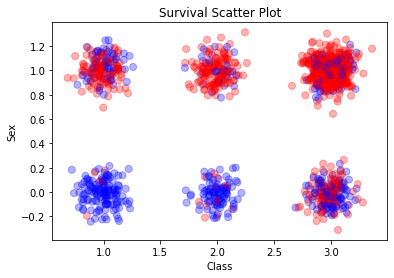

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

noisy = shuffle.iloc[:, :2] + np.random.normal(loc=0, scale=0.1, size=(1309, 2))
print(noisy.shape)
print(noisy)

plt.scatter(noisy.pclass, noisy.sex, c=["rb" [k] for k in shuffle.iloc[:,2]], s=50, alpha=0.3)
plt.ylabel('Sex') 
#0 - female, 1 - male

plt.xlabel('Class') 
#1 - 1st, 2 - 2nd, 3 - 3rd

plt.title('Survival Scatter Plot') 
#0 - died, 1 - survived

#### Quick Analysis of the Scatter Plot

In this graphic we chose to have 2 distinct colours for the 2 different cenarios (survived or died). Survived corresponds to the Red circles and Died to the Blue ones. Sex is also a binary value having value 0 for female and 1 for male. Knowing this we can see that the bottom line of circles corresponds to women that were on the Titanic and with this we can check that most of them survived in the 1st and 2nd class. In the 3rd class there are more red circles than in the other ones but we can check that there are still some blue circles. The conclusion that jumps to our eyes is that women had a much higher survival rate than men. 

Analysing the top row we already know that we are looking to men who did or did not survive the Titanic disaster. The class where most men survived is still the 1st class just like women. But differently from what we saw in women, analysing the men in this boat we can check that there were almost no survivors in 2nd or 3rd class that were men. Knowing this we can conclude that women had a higher chance of survival rate just by looking at this graphic in which we have more blue circles in the bottom row and red ones in the top row.

Analysing the Classes passengers in general survived more being in the upper classes, namingly in the 1st class. Passengers who were in 2nd class had a lower chance of survival than those who were in the 1st one but a higher chance than the 3rd class which has the most red circles, so has the lowest rate of survival and has the most deaths.

### 4.1.1 - Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(shuffle[['pclass', 'sex']].values, shuffle.survived.values, test_size=0.25)

tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)
tree.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,

In [86]:
tree.score(X_test, y_test)

0.7560975609756098

### 4.1.2 - Joint Probability

In [87]:
X_train, X_test = shuffle[:980], shuffle[980:]

In [88]:
X_train

,pclass,sex,survived
1248,3,1,0
768,3,1,0
1214,3,1,0
427,2,1,1
1295,3,1,0
...,...,...,...
166,1,1,0
1121,3,1,1
224,1,1,0
1135,3,1,0


In [89]:
joint_prob = X_train.groupby(['pclass', 'sex', 'survived']).size() / 980
joint_prob

pclass  sex  survived
1       0    0           0.002041
             1           0.113265
        1    0           0.089796
             1           0.047959
2       0    0           0.007143
             1           0.069388
        1    0           0.111224
             1           0.018367
3       0    0           0.087755
             1           0.082653
        1    0           0.316327
             1           0.054082
dtype: float64

In [90]:
X_test_features = X_test.iloc[:, :2].values
X_test_actual_results = X_test.iloc[:, 2].values

print(X_test_features)
print(X_test_actual_results)

predicted_values = []
for i in X_test_features:
    predicted_values.append(joint_prob[i[0], i[1]].idxmax())
    
predicted_values = np.array(predicted_values)
predicted_values

[[3 1]
 [3 1]
 [3 0]
 [3 1]
 [1 0]
 [3 0]
 [3 1]
 [3 0]
 [3 1]
 [1 1]
 [3 1]
 [3 1]
 [3 1]
 [1 1]
 [1 0]
 [3 1]
 [3 0]
 [1 0]
 [2 0]
 [3 1]
 [3 1]
 [3 1]
 [2 1]
 [2 0]
 [3 1]
 [1 1]
 [2 1]
 [3 1]
 [3 1]
 [3 1]
 [1 1]
 [3 0]
 [3 1]
 [3 1]
 [1 0]
 [3 1]
 [3 1]
 [3 0]
 [3 0]
 [2 0]
 [2 1]
 [2 1]
 [3 1]
 [3 1]
 [2 1]
 [3 1]
 [2 0]
 [2 1]
 [2 1]
 [1 0]
 [2 1]
 [3 0]
 [1 0]
 [3 1]
 [3 1]
 [2 1]
 [3 1]
 [1 1]
 [3 0]
 [1 0]
 [3 0]
 [3 1]
 [3 1]
 [1 1]
 [3 1]
 [1 0]
 [2 1]
 [3 1]
 [3 1]
 [2 0]
 [2 1]
 [3 1]
 [2 0]
 [3 0]
 [2 0]
 [2 0]
 [3 0]
 [3 0]
 [3 1]
 [3 1]
 [2 1]
 [3 1]
 [1 0]
 [3 1]
 [1 1]
 [3 1]
 [1 1]
 [3 1]
 [1 0]
 [2 1]
 [3 1]
 [3 0]
 [1 0]
 [1 1]
 [2 0]
 [3 0]
 [3 1]
 [2 1]
 [3 1]
 [3 1]
 [3 1]
 [1 1]
 [2 0]
 [2 1]
 [3 1]
 [3 1]
 [3 1]
 [3 1]
 [2 1]
 [3 0]
 [3 1]
 [2 0]
 [3 0]
 [1 0]
 [3 1]
 [3 1]
 [2 0]
 [2 1]
 [3 0]
 [2 1]
 [1 1]
 [3 1]
 [2 1]
 [3 0]
 [2 1]
 [1 0]
 [3 0]
 [1 1]
 [3 1]
 [1 1]
 [1 0]
 [2 1]
 [1 1]
 [3 1]
 [3 0]
 [1 0]
 [3 0]
 [3 0]
 [2 1]
 [2 1]
 [3 1]
 [3 1]
 [3 1]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [91]:
predicted_values == X_test_actual_results

array([False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
       False, False,  True,  True, False,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
       False,  True,  True, False,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True, False, False,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True, False,

In [92]:
score = (predicted_values == X_test_actual_results).sum() / 329
print(score)

0.7689969604863222


### 4.2 - Soybean Disease Dataset

In [93]:
soy = pd.read_csv('soybean.tab', sep=' ')

In [94]:
soy

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,disease
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,april,?,?,?,?,?,upper-areas,?,?,?,...,?,?,?,?,?,?,?,?,?,2-4-d-injury
679,april,lt-normal,?,lt-norm,?,diff-lst-year,scattered,?,?,?,...,?,dna,?,?,?,?,?,?,rotted,herbicide-injury
680,june,lt-normal,?,lt-norm,?,diff-lst-year,scattered,?,?,?,...,?,dna,?,?,?,?,?,?,rotted,herbicide-injury
681,april,lt-normal,?,lt-norm,?,same-lst-yr,whole-field,?,?,?,...,?,dna,?,?,?,?,?,?,rotted,herbicide-injury


In [95]:
question_marks = soy.apply(lambda x: x.str.count('\?').sum())
question_marks

date                 1
plant-stand         36
precip              38
temp                30
hail               121
crop-hist           16
area-damaged         1
severity           121
seed-tmt           121
germination        112
plant-growth        16
leaves               0
leafspots-halo      84
leafspots-marg      84
leafspot-size       84
leaf-shread        100
leaf-malf           84
leaf-mild          108
stem                16
lodging            121
stem-cankers        38
canker-lesion       38
fruiting-bodies    106
external-decay      38
mycelium            38
int-discolor        38
sclerotia           38
fruit-pods          84
fruit-spots        106
seed                92
mold-growth         92
seed-discolor      106
seed-size           92
shriveling         106
roots               31
disease              0
dtype: int64

In [96]:
soy.replace('?', np.nan, inplace=True)

In [97]:
soy

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,disease
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,april,NaN,NaN,NaN,NaN,NaN,upper-areas,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-4-d-injury
679,april,lt-normal,NaN,lt-norm,NaN,diff-lst-year,scattered,NaN,NaN,NaN,...,NaN,dna,NaN,NaN,NaN,NaN,NaN,NaN,rotted,herbicide-injury
680,june,lt-normal,NaN,lt-norm,NaN,diff-lst-year,scattered,NaN,NaN,NaN,...,NaN,dna,NaN,NaN,NaN,NaN,NaN,NaN,rotted,herbicide-injury
681,april,lt-normal,NaN,lt-norm,NaN,same-lst-yr,whole-field,NaN,NaN,NaN,...,NaN,dna,NaN,NaN,NaN,NaN,NaN,NaN,rotted,herbicide-injury


In [121]:
soy.to_csv('soybean.csv', index=False)

In [122]:
soybean = pd.read_csv('soybean.csv')

Soybean dataset has a lot of missing values, also known as NaN (not a number) values. We decided to replace them with the mode value of the column that the value is in. With this we eliminate the NaN values and complete the dataset in order to work from a complete dataset.
Using the mode we can ensure that there is always a value because it corresponds to the value that appears the most in the column and having all the data being categorical we cannot use median or mean which only work with numerical values.

In [123]:
modes = soybean.mode(numeric_only=False)
modes

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,disease
0,september,normal,gt-norm,norm,yes,same-lst-two-yrs,low-areas,pot-severe,none,80-89%,...,absent,norm,absent,norm,absent,absent,norm,absent,norm,brown-spot


In [124]:
fullbean = soybean.fillna(modes.iloc[0])
fullbean.to_csv('fullsoy.csv', index=False)
fullbean

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,disease
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,april,normal,gt-norm,norm,yes,same-lst-two-yrs,upper-areas,pot-severe,none,80-89%,...,absent,norm,absent,norm,absent,absent,norm,absent,norm,2-4-d-injury
679,april,lt-normal,gt-norm,lt-norm,yes,diff-lst-year,scattered,pot-severe,none,80-89%,...,absent,dna,absent,norm,absent,absent,norm,absent,rotted,herbicide-injury
680,june,lt-normal,gt-norm,lt-norm,yes,diff-lst-year,scattered,pot-severe,none,80-89%,...,absent,dna,absent,norm,absent,absent,norm,absent,rotted,herbicide-injury
681,april,lt-normal,gt-norm,lt-norm,yes,same-lst-yr,whole-field,pot-severe,none,80-89%,...,absent,dna,absent,norm,absent,absent,norm,absent,rotted,herbicide-injury


In [125]:
minib = pd.DataFrame(fullbean, columns=['date', 'severity'])
minib['area-damaged'] = fullbean['area-damaged'] 
minib

,date,severity,area-damaged
0,october,pot-severe,low-areas
1,august,severe,scattered
2,july,severe,scattered
3,july,severe,scattered
4,october,pot-severe,scattered
...,...,...,...
678,april,pot-severe,upper-areas
679,april,pot-severe,scattered
680,june,pot-severe,scattered
681,april,pot-severe,whole-field


In [126]:
uniquedate = minib['date'].unique()
uniquedate

array(['october', 'august', 'july', 'september', 'may', 'april', 'june'],
      dtype=object)

In [127]:
uniqued = minib['area-damaged'].unique()
uniqued

array(['low-areas', 'scattered', 'whole-field', 'upper-areas'],
      dtype=object)

In [128]:
uniques = minib['severity'].unique()
uniques

array(['pot-severe', 'severe', 'minor'], dtype=object)

In [129]:
from sklearn import preprocessing
encoded = preprocessing.LabelEncoder()

encoded.fit(minib['severity'])
list(encoded.classes_)

minib['severity'] = encoded.transform(minib['severity'])


In [130]:
encodea = preprocessing.LabelEncoder()

encodea.fit(minib['area-damaged'])
list(encodea.classes_)

minib['area-damaged'] = encodea.transform(minib['area-damaged'])

In [131]:
encodedate = preprocessing.LabelEncoder()

encodedate.fit(minib['date'])
list(encodedate.classes_)

minib['date'] = encodedate.transform(minib['date'])

In [132]:
minib

,date,severity,area-damaged
0,5,1,0
1,1,2,1
2,2,2,1
3,2,2,1
4,5,1,1
...,...,...,...
678,0,1,2
679,0,1,1
680,3,1,1
681,0,1,3


In [133]:
shufflebean = minib.iloc[np.random.permutation(len(fullbean))]
shufflebean

,date,severity,area-damaged
500,3,1,2
184,2,1,3
586,5,0,2
672,4,1,1
328,0,2,0
...,...,...,...
89,2,1,2
302,6,1,0
64,3,1,0
240,6,0,2


(683, 2)
         date  severity
500  3.010924  1.146065
184  2.045200  1.182431
586  5.043299  0.130209
672  4.111429  1.085597
328 -0.007709  2.029220
..        ...       ...
89   1.953547  0.934900
302  5.945644  1.083008
64   3.174312  0.966861
240  5.852937  0.065353
181  6.037203 -0.115601

[683 rows x 2 columns]


Text(0.5, 1.0, 'Area Damaged Scatter Plot: Severity by Date')

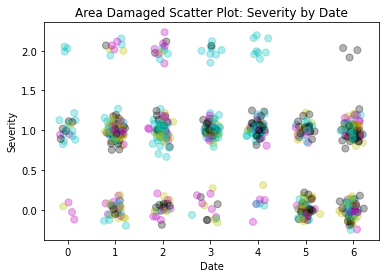

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

noisybean = shufflebean.iloc[:, :2] + np.random.normal(loc=0, scale=0.1, size=(683, 2))
print(noisybean.shape)
print(noisybean)

plt.scatter(noisybean['date'], noisybean['severity'], c=["cmykr" [k] for k in shufflebean.iloc[:,2]], s=50, alpha=0.3)
plt.ylabel('Severity') 
plt.xlabel('Date') 
plt.title('Area Damaged Scatter Plot: Severity by Date') 


### 4.2.1 - Decision Tree Classifier

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(shufflebean[['date', 'area-damaged']].values, shufflebean['severity'].values, test_size=0.3)

btree = DecisionTreeClassifier(max_depth=4)
btree.fit(X_train, y_train)
btree.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1])

In [136]:
btree.score(X_test, y_test)

0.6829268292682927

### 4.2.2 - Joint Probability

In [137]:
shufflebean

,date,severity,area-damaged
500,3,1,2
184,2,1,3
586,5,0,2
672,4,1,1
328,0,2,0
...,...,...,...
89,2,1,2
302,6,1,0
64,3,1,0
240,6,0,2


In [138]:
Xbean_train, Xbean_test = shufflebean[:510], shufflebean[510:]

In [139]:
Xbean_train

,date,severity,area-damaged
500,3,1,2
184,2,1,3
586,5,0,2
672,4,1,1
328,0,2,0
...,...,...,...
143,2,1,0
48,3,2,0
234,1,1,2
387,2,2,2


In [140]:
joint_probean = Xbean_train.groupby(['date', 'area-damaged', 'severity']).size() / 510
joint_probean

date  area-damaged  severity
0     0             1           0.017647
                    2           0.003922
      1             0           0.003922
                    1           0.003922
      2             0           0.001961
                                  ...   
6     2             0           0.019608
                    1           0.035294
      3             0           0.033333
                    1           0.039216
                    2           0.005882
Length: 65, dtype: float64

In [141]:
X_testbean_features = Xbean_test.iloc[:, :2].values
X_testbean_actual_results = Xbean_test.iloc[:, 2].values

print(X_testbean_features)
print(X_testbean_actual_results)

predicted_values = []
for i in X_test_features:
    predicted_values.append(joint_probean[i[0], i[1]].idxmax())
    
predicted_values = np.array(predicted_values)
predicted_values

[[1 2]
 [6 1]
 [3 1]
 [4 2]
 [3 1]
 [2 1]
 [2 1]
 [6 1]
 [1 1]
 [1 1]
 [6 1]
 [2 1]
 [6 1]
 [1 0]
 [1 0]
 [5 0]
 [1 1]
 [6 1]
 [2 0]
 [2 1]
 [3 1]
 [1 0]
 [1 1]
 [6 0]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [5 0]
 [3 2]
 [6 1]
 [4 1]
 [2 0]
 [3 0]
 [1 1]
 [5 1]
 [1 0]
 [0 1]
 [6 1]
 [6 1]
 [1 1]
 [5 1]
 [5 0]
 [4 1]
 [3 1]
 [4 2]
 [5 1]
 [4 1]
 [4 1]
 [5 1]
 [5 0]
 [2 0]
 [5 1]
 [4 1]
 [4 1]
 [1 1]
 [6 1]
 [1 0]
 [3 1]
 [1 1]
 [5 1]
 [6 1]
 [5 0]
 [5 1]
 [4 1]
 [1 1]
 [5 0]
 [2 1]
 [5 0]
 [5 1]
 [5 0]
 [2 1]
 [6 1]
 [2 2]
 [3 1]
 [1 1]
 [0 1]
 [1 1]
 [5 0]
 [2 2]
 [3 1]
 [3 0]
 [6 1]
 [1 2]
 [5 1]
 [1 1]
 [2 1]
 [6 1]
 [6 1]
 [6 0]
 [6 1]
 [1 1]
 [5 1]
 [5 0]
 [2 1]
 [1 2]
 [6 0]
 [1 0]
 [3 1]
 [5 0]
 [3 1]
 [4 1]
 [1 1]
 [6 0]
 [6 1]
 [6 1]
 [5 0]
 [3 1]
 [1 1]
 [2 1]
 [5 0]
 [5 0]
 [1 1]
 [1 1]
 [1 1]
 [4 1]
 [2 0]
 [4 1]
 [1 1]
 [6 0]
 [3 1]
 [4 1]
 [6 1]
 [6 1]
 [6 1]
 [2 1]
 [5 1]
 [0 2]
 [6 1]
 [5 0]
 [2 1]
 [0 1]
 [4 1]
 [1 1]
 [5 1]
 [1 1]
 [3 1]
 [4 1]
 [6 0]
 [2 1]
 [3 0]
 [3 1]
 [3 0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [142]:
predicted_values == X_test_actual_results

array([ True, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True,  True,  True, False,  True,
        True, False,  True, False, False,  True, False, False,  True,
        True,  True, False, False,  True, False,  True,  True, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False,  True,  True, False,
       False,  True,  True,  True, False,  True, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
        True, False,  True,  True,  True,  True, False,  True, False,
       False, False,  True,  True, False, False, False, False,  True,
       False,  True,  True,  True,  True,  True, False, False,  True,
       False,  True, False, False, False, False,  True, False,  True,
       False,  True,

In [143]:
score = (predicted_values == X_test_actual_results).sum() / (683-510)
print(score)

0.7052023121387283


### 5. Implement a Naive Bayes classifier from scratch

The next challenge is to implement the Naive Bayes algorithm from scratch in Python (without libraries).





In [144]:
# Make Predictions with Naive Bayes On The Iris Dataset
from csv import reader
from math import sqrt
from math import exp
from math import pi

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
		print('[%s] => %d' % (value, i))
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

# Calculate the mean of a list of numbers
def mean(numbers):
	return sum(numbers)/float(len(numbers))

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)

# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries

# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries

# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = 1
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            x = row[i]
            probabilities[class_value] *= calculate_probability(x, mean, stdev)
    return probabilities

# Predict the class for a given row
def predict(summaries, row):
	probabilities = calculate_class_probabilities(summaries, row)
	best_label, best_prob = None, -1
	for class_value, probability in probabilities.items():
		if best_label is None or probability > best_prob:
			best_prob = probability
			best_label = class_value
	return best_label

# Make a prediction with Naive Bayes on Iris Dataset
filename = 'iris.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# fit model
model = summarize_by_class(dataset)
# define a new record
row = [5.7,2.9,4.2,1.3]
# predict the label
label = predict(model, row)
print('Data=%s, Predicted: %s' % (row, label))

[Iris-virginica] => 0
[Iris-setosa] => 1
[Iris-versicolor] => 2
Data=[5.7, 2.9, 4.2, 1.3], Predicted: 2


### 6. Test the following datasets %TODO%

- Titanic Survival Dataset;
- Soybean Disease;


Titanic

In [145]:
from csv import reader
from math import sqrt
from math import exp
from math import pi
 
# Load CSV file as pd
tita_dataset = titanic.loc[:, ('sex', 'pclass', 'survived')]
tita_dataset = tita_dataset.dropna()
 
# CSV to list
dataset = tita_dataset.values.tolist()
 
 
# Convert string column to integer
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
        print('[%s] => %d' % (value, i))
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup
 
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated
 
# Calculate the mean of a list of numbersp  
def mean(numbers):
    return sum(numbers)/float(len(numbers))
 
# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)
 
# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del(summaries[-1])
    return summaries
 
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries
 
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)*2 / (2 * stdev*2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent
 
# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = 1
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            x = row[i]
            probabilities[class_value] *= calculate_probability(x, mean, stdev)
    return probabilities
 
# Predict the class for a given row
def predict(summaries, row):
    probabilities = calculate_class_probabilities(summaries, row)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return int(best_label)
 
# Make a prediction with Naive Bayes on Titanic Dataset
str_column_to_int(dataset, 0)
# pass CSV file to list
model = summarize_by_class(dataset)
# define a new record
row = [150, 23, 19, 5]
# predict the label
label = int(predict(model, row))   
print(f'Data={row}, Predicted: {label}')

[female] => 0
[male] => 1
Data=[150, 23, 19, 5], Predicted: 1


Soybean

In [153]:
# Make Predictions with Naive Bayes On The Soybean Dataset
from csv import reader
from math import sqrt
from math import exp
from math import pi

 
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated
 
# Calculate the mean of a list of numbersp  
def mean(numbers):
    return sum(numbers)/float(len(numbers))
 
# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)
 
# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del(summaries[-1])
    return summaries
 
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries
 
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)*2 / (2 * stdev*2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent
 
# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = 1
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            x = row[i]
            probabilities[class_value] *= calculate_probability(x, mean, stdev)
    return probabilities
 
# Predict the class for a given row
def predict(summaries, row):
    probabilities = calculate_class_probabilities(summaries, row)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return int(best_label)
 
# --------------------------------
 
# Make a prediction with Naive Bayes on Soybean Dataset
# pass CSV file to list
dataset = minib.values.tolist()
# fit model
model = summarize_by_class(dataset)
# define a new record
row = [200,1,56,30]
# predict the label
label = int(predict(model, row))
print(f'Data={row}, Predicted: {label}')

Data=[200, 1, 56, 30], Predicted: 2
